# 1 - Risk and return models


In this section, we compare how well the different risk models predict an out-of-sample covariance matrix, and how well the different returns models predict out-of-sample returns.

В этом разделе мы сравниваем, насколько хорошо разные модели риска предсказывают вневыборочную ковариационную матрицу, и насколько хорошо разные модели доходности предсказывают доходность вне выборки.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/1-RiskReturnModels.ipynb)
    
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/1-RiskReturnModels.ipynb)
    
[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/1-RiskReturnModels.ipynb)
    
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/1-RiskReturnModels.ipynb)

https://pyportfolioopt.readthedocs.io/en/latest/

## Risk models

In [1]:
# !pip install pandas numpy matplotlib PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
pypfopt.__version__

'1.5.3'

(7126, 20)


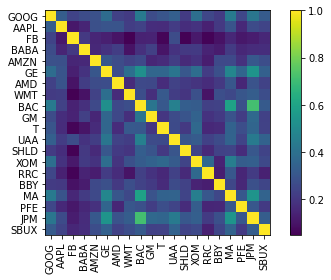

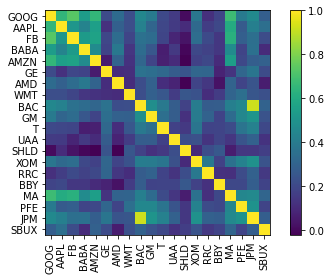

In [3]:
df = pd.read_csv("data/stock_prices.csv", parse_dates=True, index_col="date")
print(df.shape)
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


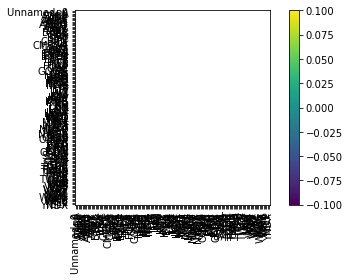

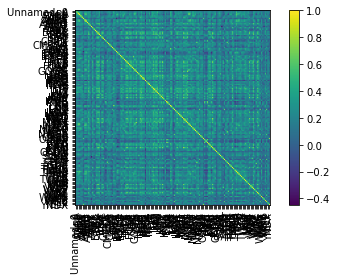

In [4]:
df = pd.read_csv("../SampleData/stock_1D_v20220613.zip", compression='zip', parse_dates=True, index_col="date")
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

In [5]:
df

,Unnamed: 0,A,AAPL,ADBE,ADP,AFG,ALRS,AMAT,AMD,AMED,...,WAL,WDC,WEC,WKHS,WMT,WRB,WSM,XEL,YELP,YNDX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-08 00:00:00+00:00,0,70.68,37.7475,241.70,132.15,65.73,102.15,33.75,20.24,132.46,...,51.28,40.03,70.72,16.48,94.98,61.23,55.81,50.50,38.08,1993.0
2019-01-09 00:00:00+00:00,1,70.68,38.2250,241.70,132.15,65.73,102.15,33.75,20.24,132.46,...,51.28,40.03,70.72,16.48,94.98,61.23,55.81,50.50,38.08,1993.0
2019-01-10 00:00:00+00:00,2,70.68,38.4000,241.70,132.15,65.73,102.15,33.75,19.28,132.46,...,51.28,40.03,70.72,16.48,94.98,61.23,55.81,50.50,38.08,1993.0
2019-01-11 00:00:00+00:00,3,70.68,38.0575,241.70,132.15,65.73,102.15,33.75,20.25,132.46,...,51.28,40.03,70.72,16.48,94.98,61.23,55.81,50.50,38.08,1993.0
2019-01-12 00:00:00+00:00,4,70.68,38.0575,241.70,132.15,65.73,102.15,33.75,20.25,132.46,...,51.28,40.03,70.72,16.48,94.98,61.23,55.81,50.50,38.08,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02 00:00:00+00:00,1180,133.24,174.0000,457.00,233.29,147.74,93.90,127.36,107.99,174.60,...,80.78,47.72,101.13,4.68,150.82,67.25,141.19,72.75,34.03,2320.0
2022-04-03 00:00:00+00:00,1181,133.24,174.0000,457.00,233.29,147.74,93.90,127.36,107.99,174.60,...,80.78,47.72,101.13,4.68,150.82,67.25,141.19,72.75,34.03,2320.0
2022-04-04 00:00:00+00:00,1182,134.47,178.2500,468.80,234.80,143.63,93.55,129.30,110.45,169.68,...,81.15,49.21,100.48,5.35,150.01,66.24,148.22,72.58,35.39,2275.8


In [7]:
df.columns.to_list()

['Unnamed: 0',
 'A',
 'AAPL',
 'ADBE',
 'ADP',
 'AFG',
 'ALRS',
 'AMAT',
 'AMD',
 'AMED',
 'AMG',
 'AMT',
 'AVAV',
 'AVT',
 'AWK',
 'BBBY',
 'BC',
 'BK',
 'BLK',
 'BMY',
 'C',
 'CAT',
 'CERN',
 'CL',
 'CLF',
 'CMCSA',
 'CSCO',
 'CVS',
 'CWT',
 'DHI',
 'DVA',
 'EBAY',
 'ENPH',
 'EXEL',
 'EXPD',
 'F',
 'FAST',
 'FB',
 'FCX',
 'FITB',
 'FLS',
 'FOXF',
 'GE',
 'GHC',
 'GM',
 'GOOG',
 'GS',
 'GTX',
 'HIBB',
 'HIG',
 'HON',
 'HPE',
 'HPQ',
 'HRL',
 'IBKR',
 'IBM',
 'INTC',
 'IP',
 'IT',
 'ITT',
 'ITW',
 'IVZ',
 'JCI',
 'JNJ',
 'JPM',
 'KDP',
 'KEY',
 'KHC',
 'KIDS',
 'KMB',
 'KO',
 'KR',
 'LEN',
 'LKQ',
 'LMT',
 'LNT',
 'LOW',
 'LPLA',
 'MAT',
 'MCD',
 'MDT',
 'MED',
 'MET',
 'MKL',
 'MMM',
 'MS',
 'MSFT',
 'MU',
 'NAVI',
 'NDAQ',
 'NEE',
 'NFLX',
 'NUE',
 'NWSA',
 'OGE',
 'ORCL',
 'OSIS',
 'OZON',
 'PEP',
 'PFE',
 'PG',
 'PGTI',
 'PIPR',
 'PM',
 'PRU',
 'PWR',
 'PYPL',
 'QADA',
 'RJF',
 'SBUX',
 'SIG',
 'SKM',
 'SLB',
 'SO',
 'SPCE',
 'STLD',
 'T',
 'TDC',
 'TDOC',
 'TKR',
 'TMUS',
 'TPIC',

We can see that visually, the sample covariance does not capture some of the new features of the covariance matrix, for example the highly correlated group of FAANG stocks. We may be able to improve this by using an exponentially-weighted covariance matrix, which gives more weight to recent data. We can also look at how each model predicts future variance.

Мы можем видеть, что визуально ковариация выборки не отражает некоторые новые особенности ковариационной матрицы, например, сильно коррелированную группу акций FAANG. Мы можем улучшить это, используя экспоненциально взвешенную ковариационную матрицу, которая придает больший вес последним данным. Мы также можем посмотреть, как каждая модель предсказывает будущую дисперсию.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:216: RuntimeWarning: overflow encountered in square
  X2 = X ** 2
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:237: RuntimeWarning: overflow encountered in square
  delta_ += np.sum(np.dot(X.T[block_size * n_splits:],
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:243: RuntimeWarning: invalid value encountered in double_scalars
  beta = 1. / (n_features * n_samples) * (beta_ / n_samples - delta_)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_shrunk_covariance.py:245: RuntimeWarning: invalid value encountered in double

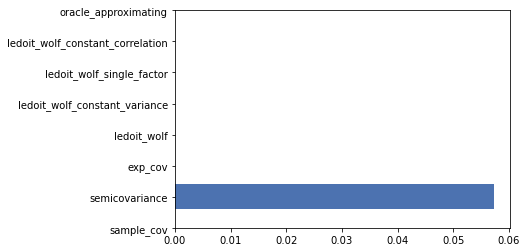

In [17]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

We can see that the exponential covariance matrix is a much better estimator of future variance compared to the other models. Its mean absolute error is 2%, which is actually pretty good. Let's visually compare the exponential cov matrix to the realised future cov matrix:

Мы видим, что экспоненциальная ковариационная матрица является гораздо лучшей оценкой будущей дисперсии по сравнению с другими моделями. Его средняя абсолютная ошибка составляет 2%, что на самом деле очень хорошо. Давайте визуально сравним экспоненциальную матрицу cov с реализованной будущей матрицей cov:

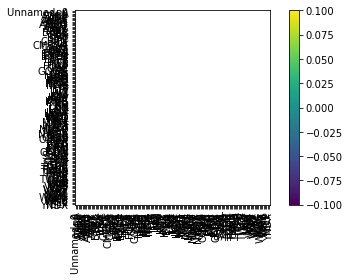

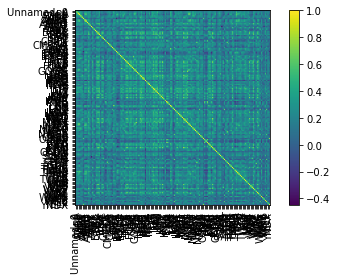

In [18]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

## Returns

What about returns? Will the exponentially-weighted returns similarly be the best performer?

Как насчет возвратов? Будет ли экспоненциально взвешенная доходность такой же лучшей?

C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


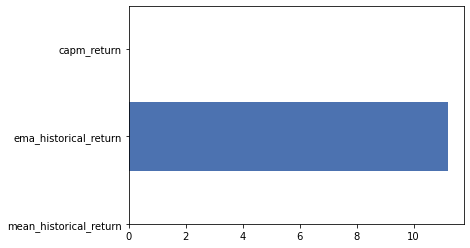

In [19]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [20]:
print(mean_abs_errors)

[inf, 11.200147086548919, 0.0]


The exponential moving average is marginally better than the others, but the improvement is almost unnoticeable. We also note that the mean absolute deviations are above 25%, meaning that if your expected annual returns are 10%, on average the realised annual return could be anywhere from a 15% loss to a 35% gain. This is a massive range, and gives some context to the advice in the docs suggesting that you optimize without providing an estimate of returns.

Экспоненциальное скользящее среднее немного лучше, чем другие, но улучшение практически незаметно. Мы также отмечаем, что средние абсолютные отклонения превышают 25 %, а это означает, что если ваша ожидаемая годовая доходность составляет 10 %, в среднем реализованная годовая доходность может составлять от 15 % убытка до 35 % прибыли. Это огромный диапазон, и он дает некоторый контекст советам в документах, предлагающим оптимизировать без предоставления оценки прибыли.

C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


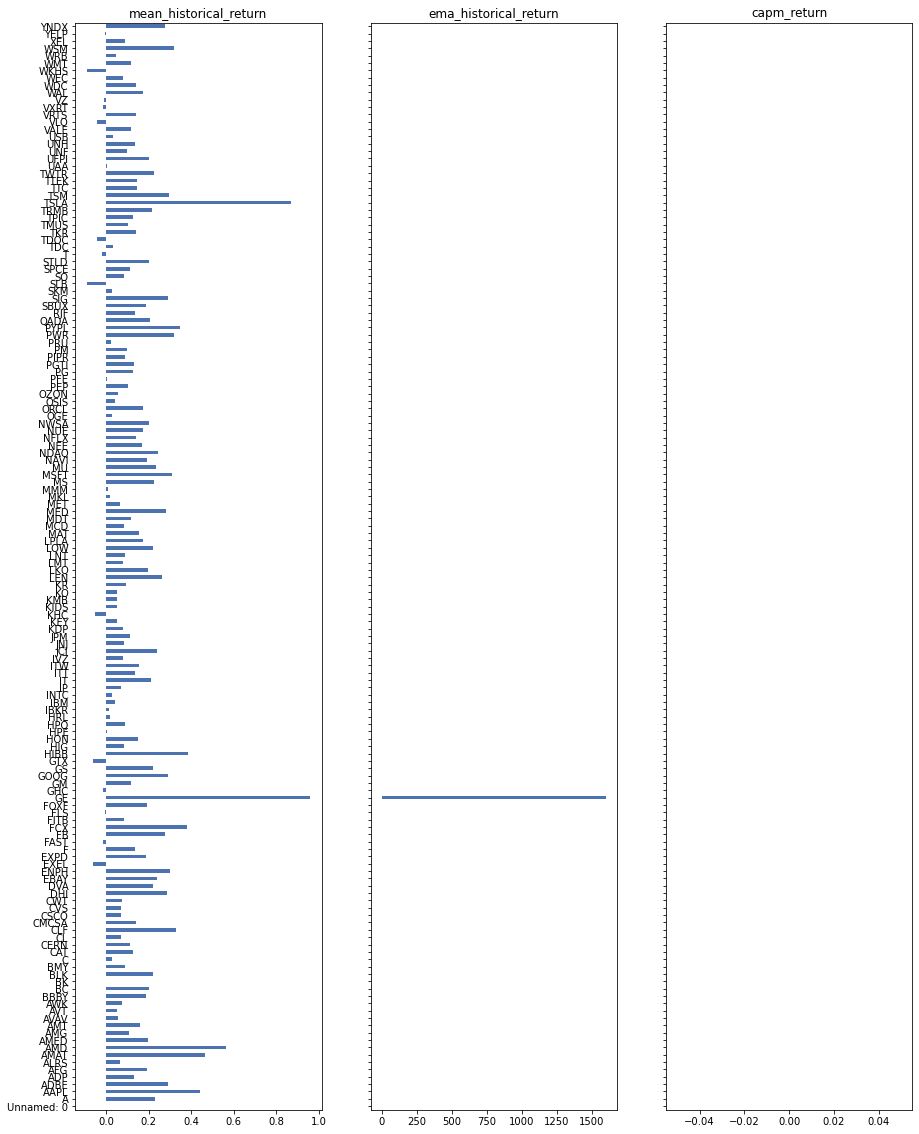

In [23]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,20))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

The good news is that we see a good degree of agreement (apart from the `ema` method).

Хорошая новость заключается в том, что мы видим хорошую степень согласия (кроме метода «ema»).